In [9]:
import numpy as np
import matplotlib.pyplot as plt
from msibi.utils.smoothing import savitzky_golay
import glob

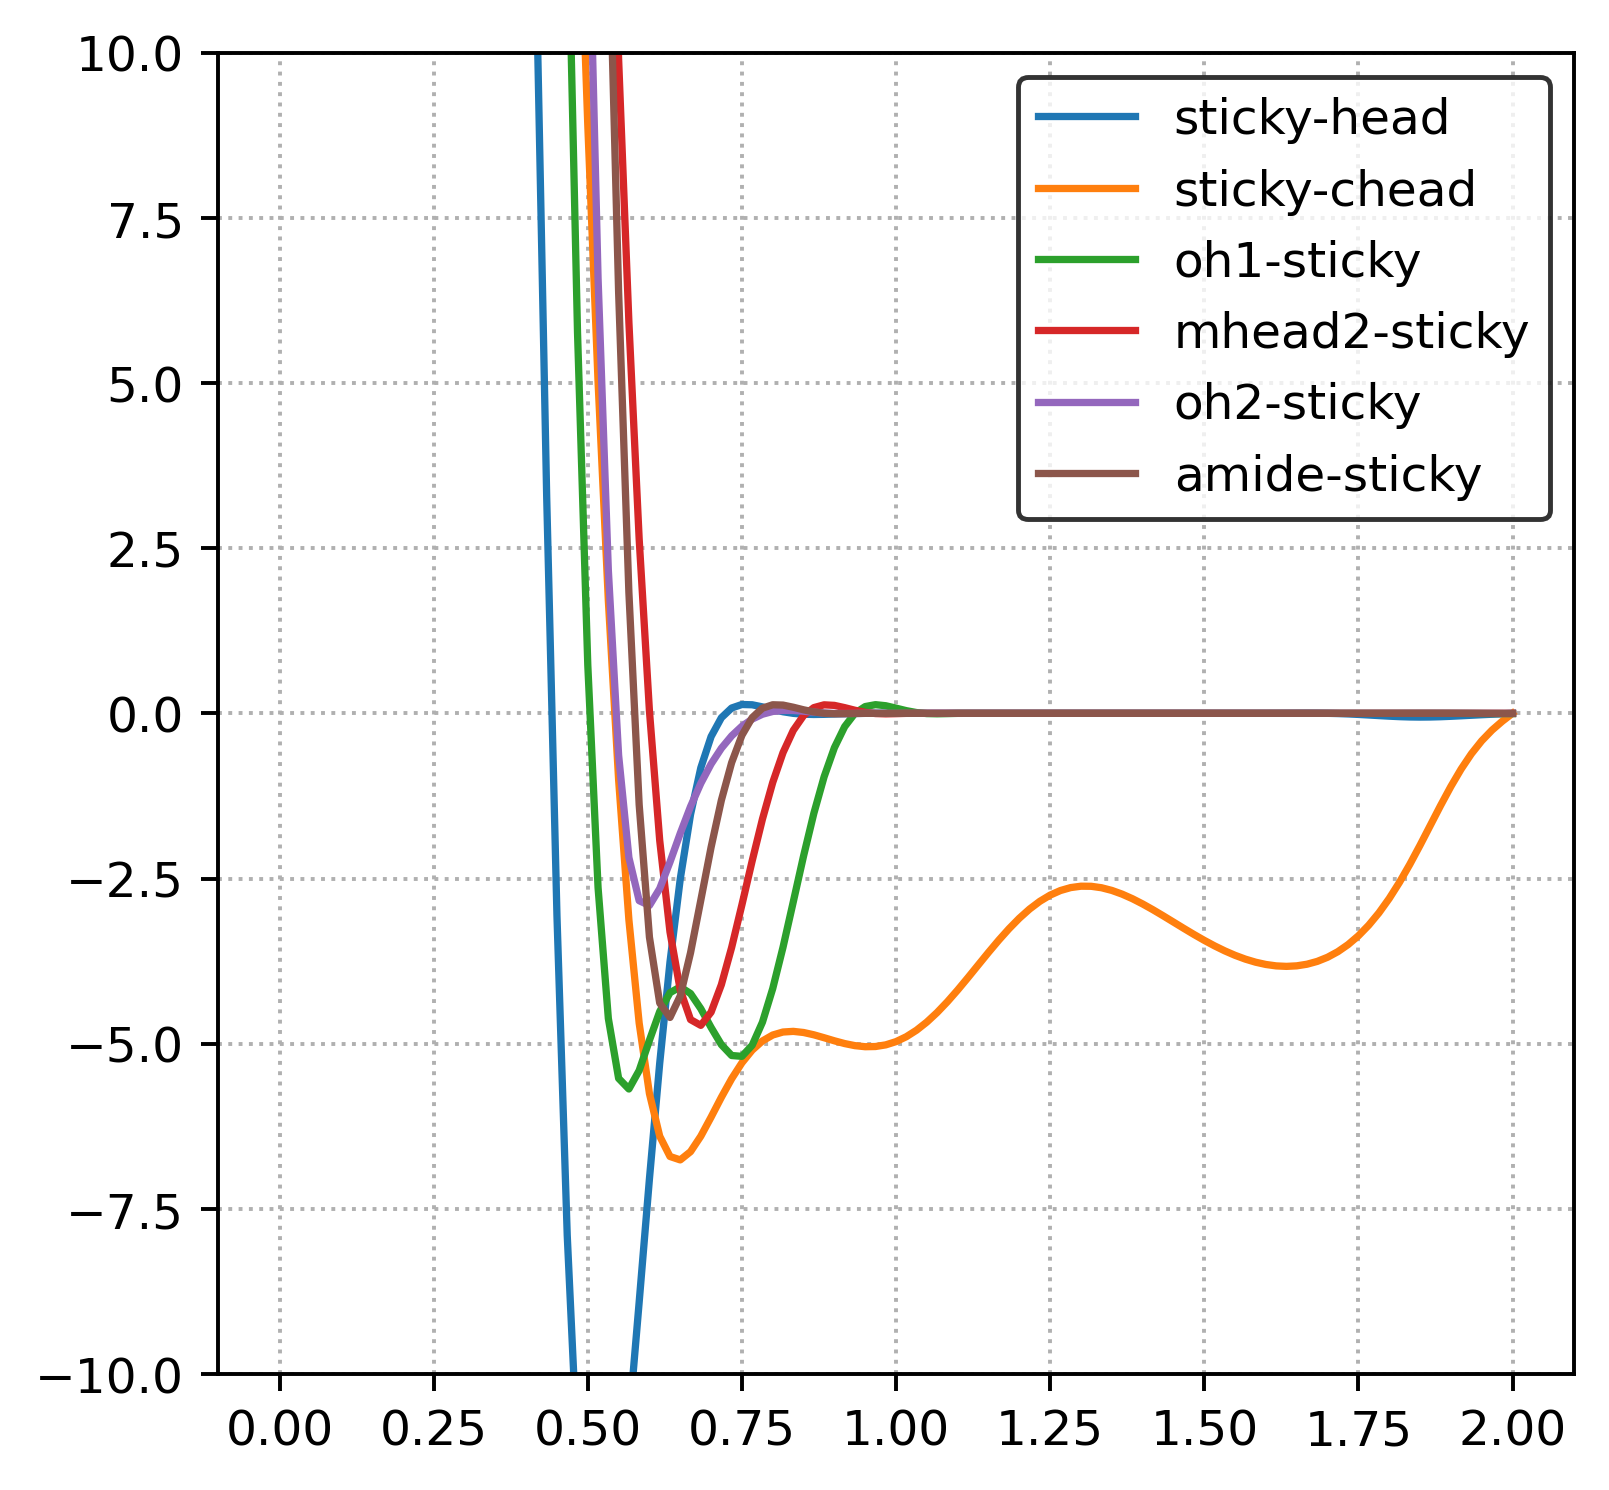

In [27]:
plt.figure(dpi=350, figsize=(5,5))
for f in glob.glob("*sticky*txt"):
    if any([x in f for x in ["mhead2", "amide", "oh1", "oh2", "chead", "head"]]):
        data = np.loadtxt(f)
        rmin = np.argmin(data[:,1])
        for i, _ in enumerate(data):
            if data[i,1] > 0 and i > rmin:
                data[i,1] = 0
        if np.min(data[:,1]) > -2.5:
            data[:,1] *= 3
            
        data[:,1] = savitzky_golay(data[:,1], 11, 3)
        data[:,1] = savitzky_golay(data[:,1], 15, 3)
        dr = data[2,0]-data[1,0]
        data[:,2] = -1 * np.gradient(data[:,1], dr)
        plt.plot(data[:,0], data[:,1], label=f.split(".")[0])
        np.savetxt(f, data)
plt.ylim((-10, 10))
plt.legend()